In [ ]:
import numpy as np
from impedance.models.circuits.fitting import rmse
from impedance.models.circuits.elements import circuit_elements, get_element_from_name
from impedance.models.circuits import CustomCircuit
from impedance import preprocessing
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit

[22.46061 -0.60048j 22.52152 -0.6432j  22.63311 -0.63687j
 22.78506 -0.66071j 22.89016 -0.73092j 23.01492 -0.78656j
 23.17179 -0.94181j 23.26098 -0.86966j 23.41595 -0.92059j
 23.57821 -1.01025j 23.74557 -1.0993j  23.94445 -1.18276j
 24.18051 -1.25153j 24.36526 -1.34808j 24.60258 -1.42586j
 24.85126 -1.51886j 25.10061 -1.58527j 25.35619 -1.68082j
 25.6201  -1.77132j 25.85408 -1.87343j 26.09363 -2.0247j
 26.31177 -2.18977j 26.54349 -2.3544j  26.86758 -2.70085j
 27.05002 -3.0343j  27.35623 -3.44068j 27.65027 -4.03818j
 28.01316 -4.78905j 28.43571 -5.6179j  28.96368 -6.66341j
 29.62867 -7.99099j 30.48341 -9.55422j 31.6631 -11.49752j
 33.20046-13.69431j 35.35399-16.17848j 38.15144-18.80428j
 41.70833-21.63862j 46.43034-24.08504j 51.97469-26.18343j
 58.01413-27.00842j 64.54993-26.72365j]


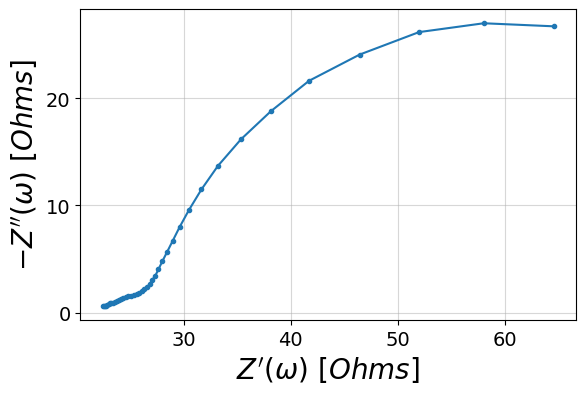

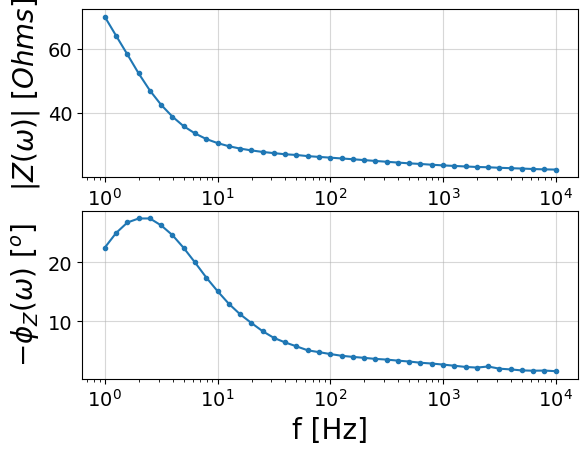

In [132]:
# Load data from a CSV with no headers, just make sure that you write Frequency|Zim|Zre in that order
from impedance import preprocessing
from impedance.visualization import plot_nyquist, plot_bode
import csv
#Modify the name for your file at XXX.csv
data=np.genfromtxt('Ag1+FPMK03_05V -RDE-st2.csv', delimiter=',')
frequencies = data[:, 0]
Z = data[:, 1] + 1j*data[:, 2]
#This takes out the negative values which are just artifacts from the measurement
def ignoreBelowX(frequencies, Z):
    
    frequencies = frequencies[np.imag(Z) < 0]
    Z = Z[np.imag(Z) < 0]
    return frequencies, Z
#This you can delete if you do not want to check the array of data
#print (Z)
#print (frequencies)7
#Data preview
plot_nyquist(Z)
plot_bode(frequencies, Z)
plt.show()

In [133]:
#KK linearity method
# Load data from the same file you want to analyze, this is just to check the validity of the data
#Modify the name for your file at XXX.csv
data=np.genfromtxt('Au1+FPMK03_05V -RDE-st2.csv', delimiter=',')
f = data[:, 0]
Z = data[:, 1] + 1j*data[:, 2]

# keep only the impedance data in the first quandrant
f, Z = preprocessing.ignoreBelowX(f, Z)
mask = f < 100000
f = f[mask]
Z = Z[mask]

In [134]:
from impedance.validation import linKK
M, mu, Z_linKK, res_real, res_imag = linKK(f, Z, c=.5, max_M=100, fit_type='complex', add_cap=True)
print('\nCompleted Lin-KK Fit\nM = {:d}\nmu = {:.2f}'.format(M, mu))

10 0.9434735225480553 0.8255301980291592

Completed Lin-KK Fit
M = 13
mu = 0.48


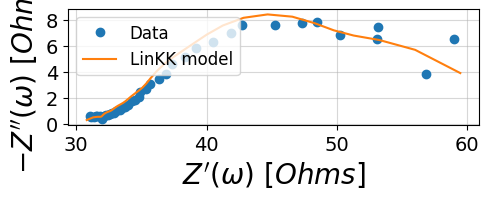

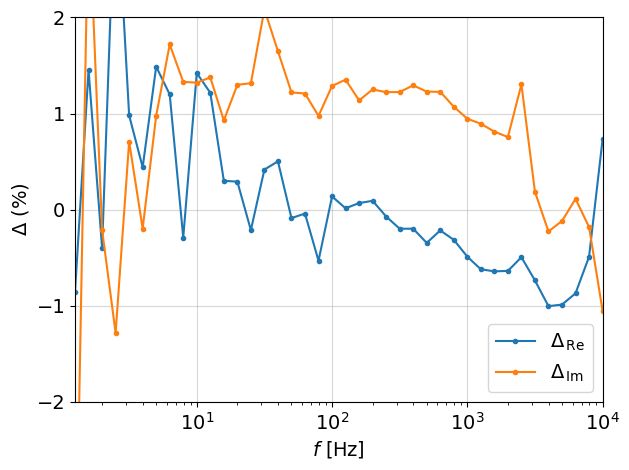

In [135]:
from impedance.visualization import plot_nyquist, plot_residuals
fig, ax = plt.subplots(figsize = (5,8))
plot_nyquist(Z, fmt='o', ax=ax, scale = 1)
plot_nyquist(Z_linKK, fmt='-', ax=ax, scale = 1)
ax.legend(['Data', 'LinKK model'], loc=2, fontsize=12)
plt.tight_layout()
fig, ax1 = plt.subplots()
plot_residuals(ax1,f, res_real, res_imag, y_limits=(-2,2))
plt.tight_layout()

In [131]:
#This could be a simple Randles circuit or any other arrangement that you think describes your system. You can check that 
circuit = 'R0-p(R1-Ws1,CPE2)-CPE3' 
initial_guess = [1000,10,0.1,0.5,0.1,0.8,0.1,0.8]
circuit = CustomCircuit(circuit, initial_guess=initial_guess)
circuit.fit(frequencies, Z)
print (circuit)

C:\Users\segura_n\AppData\Local\miniconda3\envs\impedance-analysis\Lib\site-packages\impedance\models\circuits\elements.py:190: RuntimeWarning: overflow encountered in tanh
  Z = Z0 * np.tanh(np.sqrt(1j * omega * tau)) / np.sqrt(1j * omega * tau)



Circuit string: R0-p(R1-Ws1,CPE2)-CPE3
Fit: True

Initial guesses:
     R0 = 1.00e+03 [Ohm]
     R1 = 1.00e+01 [Ohm]
  Ws1_0 = 1.00e-01 [Ohm]
  Ws1_1 = 5.00e-01 [sec]
  CPE2_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []
  CPE3_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE3_1 = 8.00e-01 []

Fit parameters:
     R0 = 1.83e+01  (+/- 1.75e+00) [Ohm]
     R1 = 4.77e+01  (+/- 4.25e+00) [Ohm]
  Ws1_0 = 1.15e-16  (+/- 8.09e+01) [Ohm]
  Ws1_1 = 2.49e+02  (+/- 9.30e-12) [sec]
  CPE2_0 = 2.51e-03  (+/- 1.32e-04) [Ohm^-1 sec^a]
  CPE2_1 = 1.00e+00  (+/- 2.67e-02) []
  CPE3_0 = 5.29e-02  (+/- 2.82e-03) [Ohm^-1 sec^a]
  CPE3_1 = 1.35e-01  (+/- 3.78e-02) []



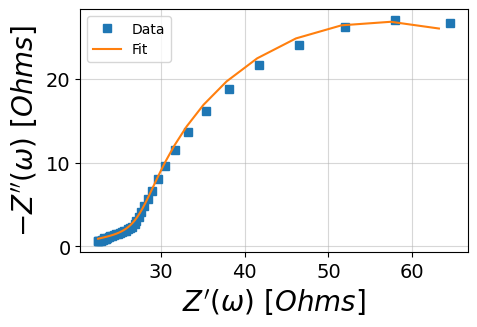

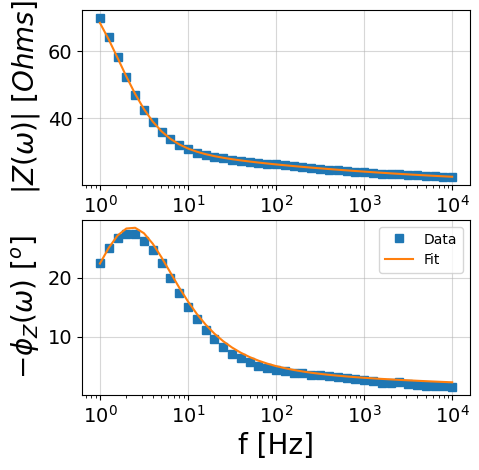

In [127]:
from impedance.visualization import plot_nyquist

#plt.savefig('PtC_Parviz.png', dpi=500,bbox_inches='tight')
Z_fit = circuit.predict(frequencies)
fig, ax = plt.subplots(figsize = (5,8))
plot_nyquist(Z, fmt='s',ax=ax)
plot_nyquist(Z_fit, fmt='-',ax=ax)
plt.legend(['Data', 'Fit'])
plt.show()


circuit.plot(f_data=frequencies, Z_data=Z, kind='bode')
plt.legend(['Data', 'Fit'])

#plt.savefig('BodeFit-au1+FPMK03_OCP.png', dpi=300, bbox_inches='tight')
plt.show()

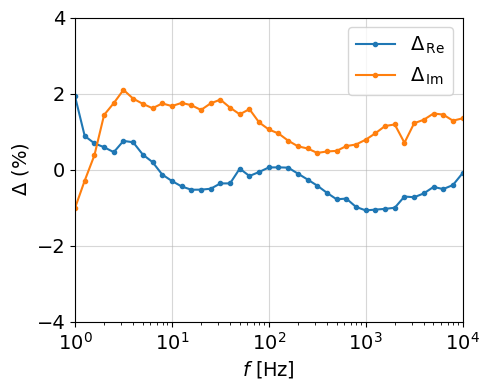

In [128]:
#Residuals of fit model
from impedance.visualization import plot_residuals

res_meas_real = (Z-circuit.predict(frequencies)).real/np.abs(Z)
res_meas_imag = (Z-circuit.predict(frequencies)).imag/np.abs(Z)
#fig, ax = plt.subplots(figsize = (5,8))
# plot original data
#plot_nyquist(Z, fmt='s',ax=ax)
# plot measurement model
#plot_nyquist(circuit.predict(frequencies), fmt='-', scale=1, ax=ax, units='\Omega')
#ax.legend(['Data', 'Fit'], loc=2, fontsize=12)
# Plot residuals
fig, ax2 = plt.subplots(figsize = (5,4))
plot_residuals(ax2, frequencies, res_meas_real, res_meas_imag, y_limits=(-4,4))
plt.tight_layout()
plt.show()

In [25]:
#This is for exporting the data results into the same folder you are
from numpy import savetxt
a=np.vstack((frequencies))
b=np.vstack((Z))
c=np.vstack((Z_fit))
d= circuit
e=np.vstack(Z_linKK)
f=np.vstack(res_real)
g=np.vstack(res_imag)
np.savetxt('fitdataAu1+FPMK03_OCP.csv',np.column_stack((a,c,e)), header='frequencies, Zrefit, Zimfit, Zrelinkk, Zimlinkk')
np.savetxt('resAu1+FPMK03_OCP.csv',np.column_stack((f,g)), header='Res_real,Res_imag')
np.savetxt('fitcircuitAu1+FPMK03_OCP.csv', [d], fmt='%s')